In [1]:
from fenics import *

In [2]:
# Scaled variables
L = 1
W = 0.2
mu = 1
rho = 1
delta = W / L
gamma = 0.4 * delta**2
beta = 1.25
lambda_ = beta
g = gamma


In [4]:
# Create mesh and define function space
mesh = BoxMesh(Point(0, 0, 0), Point(L, W, W), 10, 3, 3)
V = VectorFunctionSpace(mesh, 'P', 1)
# Define boundary condition
tol = 1E-14


def clamped_boundary(x, on_boundary):
    return on_boundary and x[0] < tol


bc = DirichletBC(V, Constant((0, 0, 0)), clamped_boundary)


# Define strain and stress
def epsilon(u):
    return 0.5 * (nabla_grad(u) + nabla_grad(u).T)
    # return sym(nabla_grad(u))


def sigma(u):
    return lambda_ * nabla_grad(u) * Identity(d) + 2 * mu * epsilon(u)


# Define variational problem
u = TrialFunction(V)
d = u.geometric_dimension()  # space dimension
v = TestFunction(V)
f = Constant((0, 0, -rho * g))
T = Constant((0, 0, 0))
a = inner(sigma(u), epsilon(v)) * dx
L = dot(f, v) * dx + dot(T, v) * ds


In [5]:
# Compute solution
u = Function(V)
solve(a == L, u, bc)


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.


*** Warning: Matplotlib plotting backend does not support displacement for 3 in 3. Continuing without plotting...
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


AttributeError: 'dolfin.cpp.la.PETScVector' object has no attribute 'array'

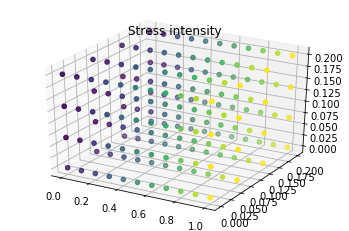

In [6]:
# Plot solution
plot(u, title='Displacement', mode='displacement')
# Plot stress
s = sigma(u) - (1./3)*tr(sigma(u))*Identity(d) # deviatoric stress
von_Mises = sqrt(3./2*inner(s, s))
V = FunctionSpace(mesh, 'P', 1)
von_Mises = project(von_Mises, V)
plot(von_Mises, title='Stress intensity')
# Compute magnitude of displacement
u_magnitude = sqrt(dot(u, u))
u_magnitude = project(u_magnitude, V)
plot(u_magnitude, 'Displacement magnitude')
print('min/max u:',
u_magnitude.vector().array().min(),
u_magnitude.vector().array().max())